In [99]:
import os
import pandas as pd


database = 'w3a'
database = 'a5a'
#database = 'Diabetes'

path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/decomposition-measurement-ii/'
results_directory = path + f'results/{database}/'  # Replace this with the path to your directory
analysis_files = path + f'analysis/{database}'
plot_path = f'{analysis_files}/'
tables_path = f'{analysis_files}/latex-tables/'

## columns names 
n_components_column_name = 'n-components'
total_training_time_mean_column = 'transform-and-training-time-mean'
total_training_time_std_column = 'transform-and-training-time-std'
# relevant column names 
transform_time_mean_column = 'transform-time-mean'
transform_time_std_column = 'transform-time-std'
training_time_mean_column = 'training-time-mean'
training_time_std_column = 'training-time-std'


# Get a list of all files in the directory
files = [file for file in os.listdir(results_directory) if os.path.isfile(os.path.join(results_directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
stats_files = [file for file in files if "stats" in file]
stats_files.sort() # kernel methods será el primero

kernel_files = [file for file in stats_files if ('kernel' in file and 'kernel-linear' not in file)]
random_features_files = [file for file in stats_files if file not in kernel_files]


# Create a DataFrame for random_features files
random_features_data = pd.DataFrame()
random_features_list = []
random_features_list_names = []
random_features_data_verbose = pd.DataFrame()
for file in random_features_files:
    # mean
    file_path = os.path.join(results_directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    data['File'] = file  # Add a column to identify the file 
    # 
    data[total_training_time_mean_column] = data[transform_time_mean_column] + data[training_time_mean_column]
    data[total_training_time_std_column] = data[transform_time_std_column] + data[training_time_std_column]

    random_features_data = pd.concat([random_features_data, data], ignore_index=True)
    random_features_list.append(data)
    random_features_list_names.append(file.replace('-stats.csv', ''))


kernel_data = pd.DataFrame()
kernel_data_verbose = pd.DataFrame()
kernel_list = []
kernel_list_names = []
for file in kernel_files:
    file_path = os.path.join(results_directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed

    data['File'] = file  # Add a column to identify the file
    data.rename(columns={'score-in-test-mean': 'score-mean', 'score-in-test-std': 'score-std'}, inplace=True)
    data[total_training_time_mean_column] = data[training_time_mean_column]
    data[total_training_time_std_column] = data[training_time_std_column]

    kernel_data = pd.concat([kernel_data, data], ignore_index=True)
    kernel_list.append(data)
    kernel_list_names.append(file.replace('-stats.csv', ''))

print('Ridge files')
print(kernel_list_names)
print('kernel files')
print(kernel_list_names)
#kernel_data



['Nystroem-SVC-kernel-linear-stats-a.csv', 'results.dict', 'Nystroem-linear-SVC-dual-false-stats-a.csv', 'RFF-linear-SVC-dual-false-stats-a.csv', 'kernel-SVC-verbose.csv', 'RFF-SVC-kernel-linear-stats-a.csv', 'RFF-verbose.csv', 'Nystroem-verbose.csv', 'kernel-SVC-stats.csv']
Ridge files
['kernel-SVC']
kernel files
['kernel-SVC']


In [100]:
random_features_data

,n-components,fit-time-mean,fit-time-std,transform-time-mean,transform-time-std,training-time-mean,training-time-std,prediction-time-mean,prediction-time-std,score-mean,score-std,File,transform-and-training-time-mean,transform-and-training-time-std
0,5,0.000985,0.000840,0.000985,0.000201,0.205668,0.017720,0.652731,0.002242,0.760269,0.000262,Nystroem-SVC-kernel-linear-stats-a.csv,0.206653,0.017920
1,50,0.001097,0.000057,0.001097,0.000587,0.520829,0.007034,1.699316,0.011612,0.763539,0.003442,Nystroem-SVC-kernel-linear-stats-a.csv,0.521926,0.007621
2,95,0.002177,0.000082,0.002177,0.001116,0.888174,0.007907,3.057807,0.022594,0.766971,0.004251,Nystroem-SVC-kernel-linear-stats-a.csv,0.890351,0.009023
3,140,0.005640,0.000623,0.005640,0.003170,1.171682,0.008719,4.109325,0.040999,0.769352,0.005607,Nystroem-SVC-kernel-linear-stats-a.csv,1.177323,0.011889
4,184,0.024125,0.015486,0.024125,0.005093,1.507323,0.003447,5.430946,0.048956,0.772689,0.004250,Nystroem-SVC-kernel-linear-stats-a.csv,1.531448,0.008539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,757,0.001871,0.000021,0.001871,0.000428,0.292423,0.017191,0.248739,0.019294,0.758567,0.003599,RFF-linear-SVC-dual-false-stats-a.csv,0.294294,0.017619
76,809,0.001980,0.000010,0.001980,0.002638,0.325405,0.024706,0.262519,0.022646,0.761454,0.003344,RFF-linear-SVC-dual-false-stats-a.csv,0.327384,0.027344
77,860,0.002084,0.000008,0.002084,0.001283,0.352924,0.025782,0.285048,0.017609,0.759313,0.001702,RFF-linear-SVC-dual-false-stats-a.csv,0.355008,0.027065
78,911,0.002242,0.000103,0.002242,0.002051,0.376242,0.020494,0.296578,0.027427,0.758165,0.003345,RFF-linear-SVC-dual-false-stats-a.csv,0.378484,0.022545


In [101]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File", column, n_components_column_name]]
   
      return dataframe

In [102]:
# get columns to be plot
mean_columns_to_be_plot = [column for column in random_features_data.columns if 'mean' in column]
std_columns_to_be_plot = [column for column in random_features_data.columns if 'std' in column]


# Sort by score 

In [103]:
kernel_data['training-time-mean']

0    193.572143
Name: training-time-mean, dtype: float64

In [104]:
show_dataframe(random_features_data, total_training_time_mean_column, ascending=False, n_rows=10)

,File,transform-and-training-time-mean,n-components
19,Nystroem-SVC-kernel-linear-stats-a.csv,10.768,962
59,RFF-SVC-kernel-linear-stats-a.csv,10.485,962
18,Nystroem-SVC-kernel-linear-stats-a.csv,10.127,911
58,RFF-SVC-kernel-linear-stats-a.csv,9.904,911
17,Nystroem-SVC-kernel-linear-stats-a.csv,9.406,860
...,...,...,...
21,Nystroem-linear-SVC-dual-false-stats-a.csv,0.018,50
62,RFF-linear-SVC-dual-false-stats-a.csv,0.018,95
61,RFF-linear-SVC-dual-false-stats-a.csv,0.009,50
20,Nystroem-linear-SVC-dual-false-stats-a.csv,0.004,5


# Plotting 

In [105]:
indice = 0
for i,r in enumerate(random_features_list_names):
    if 'RFF-SVC' in  r:
        indice = i
        break


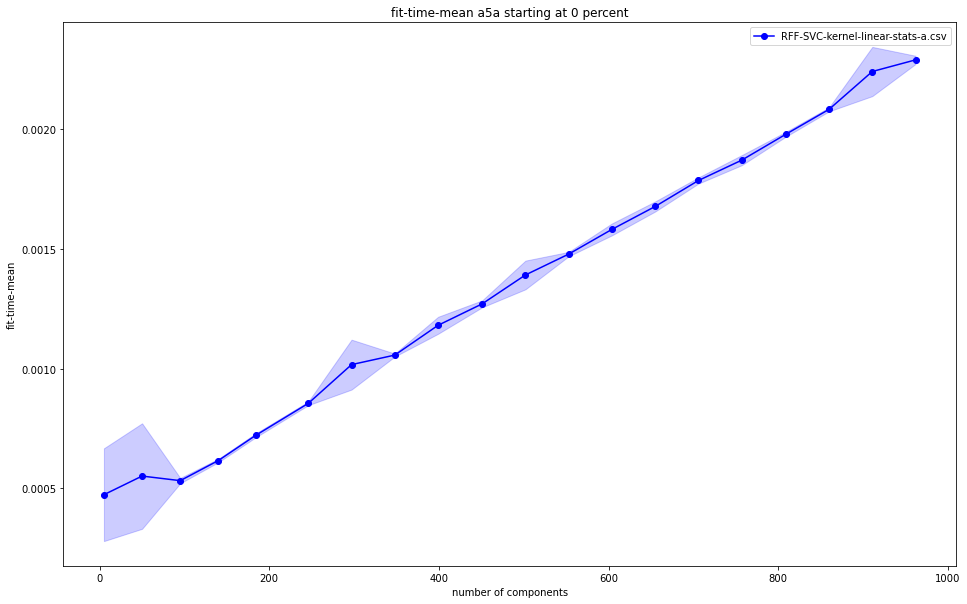

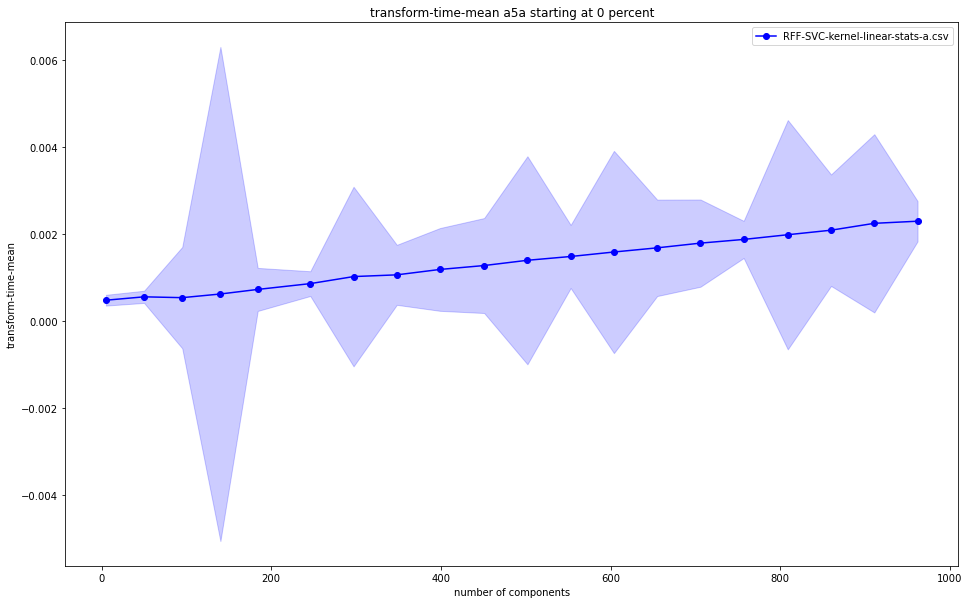

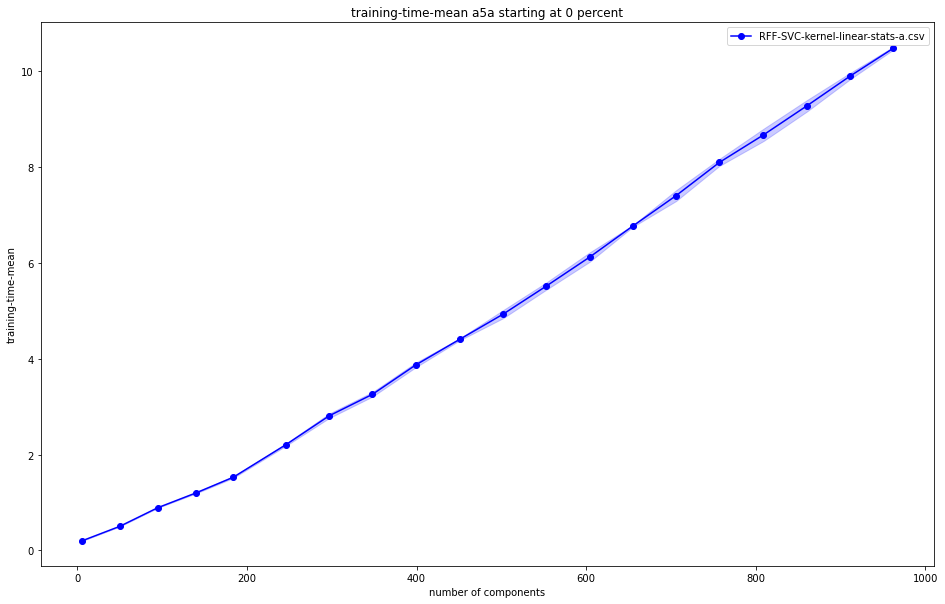

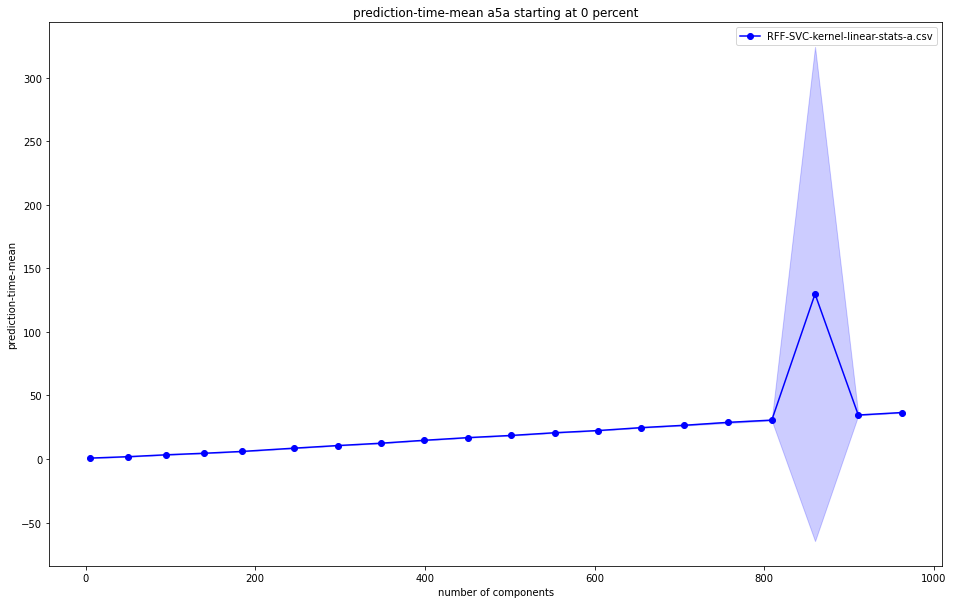

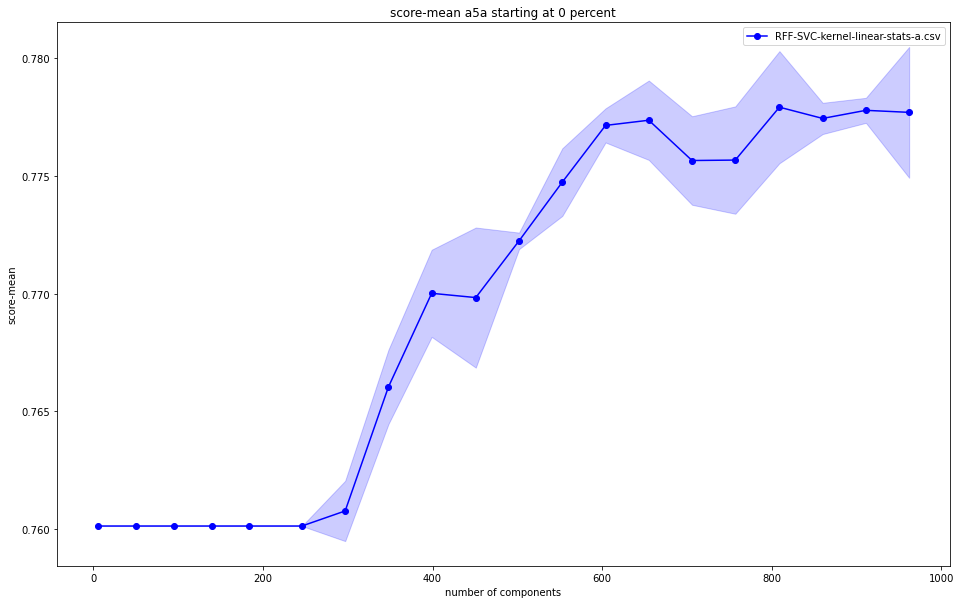

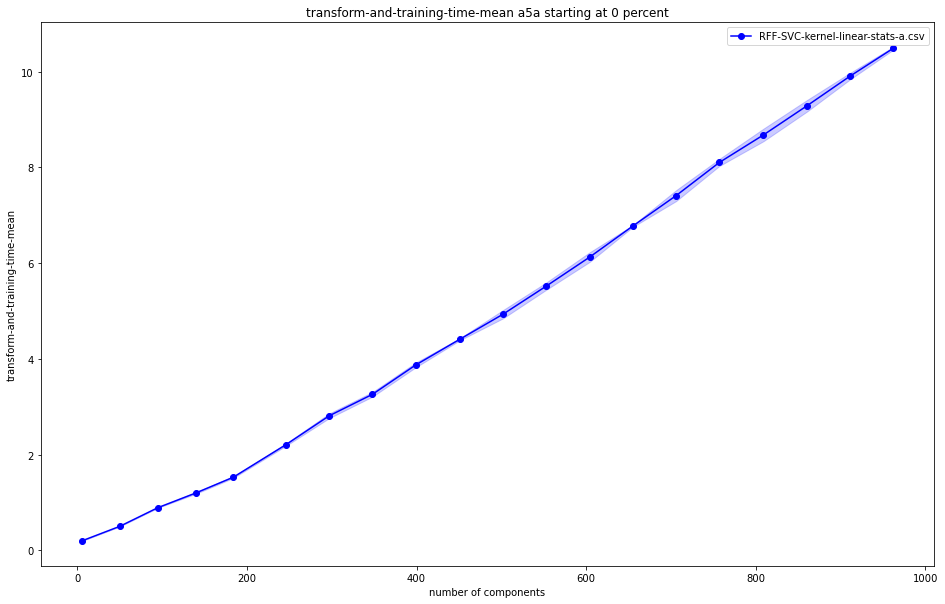

In [106]:
from plotting import view_plots_and_save_them


view_plots_and_save_them(df_list = [random_features_list[indice]], df_list_names=[random_features_list_names[indice]], 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=kernel_list, constant_labels=[],
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')


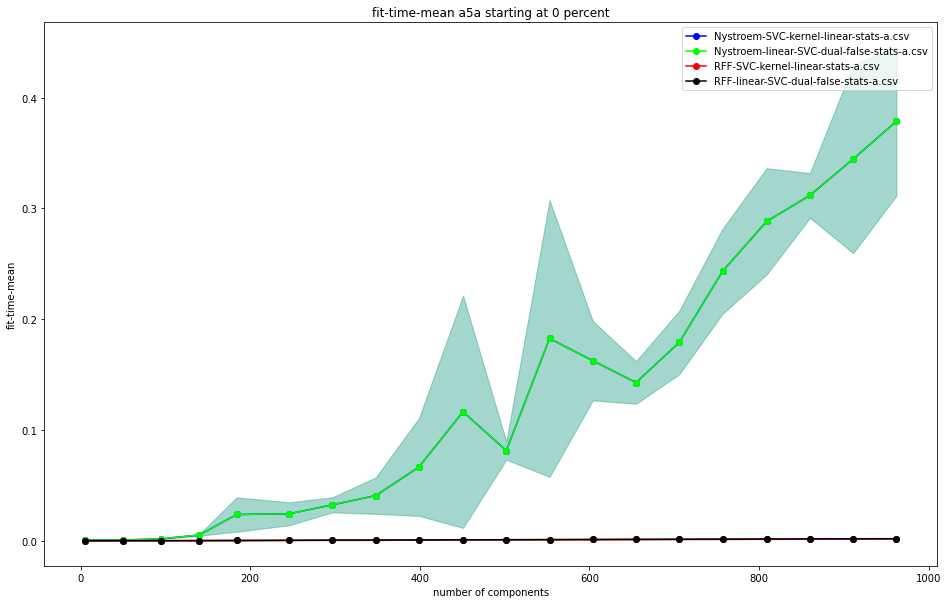

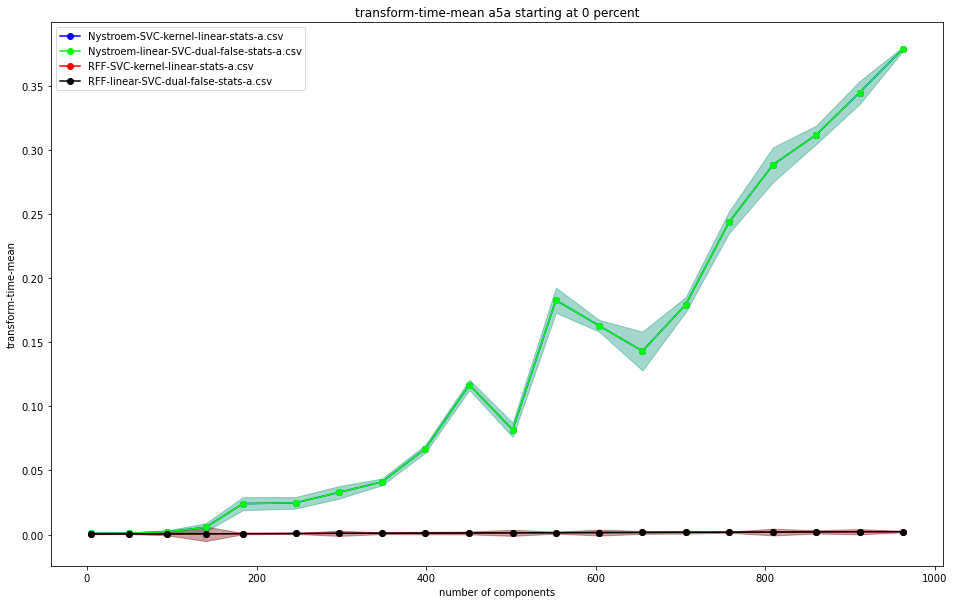

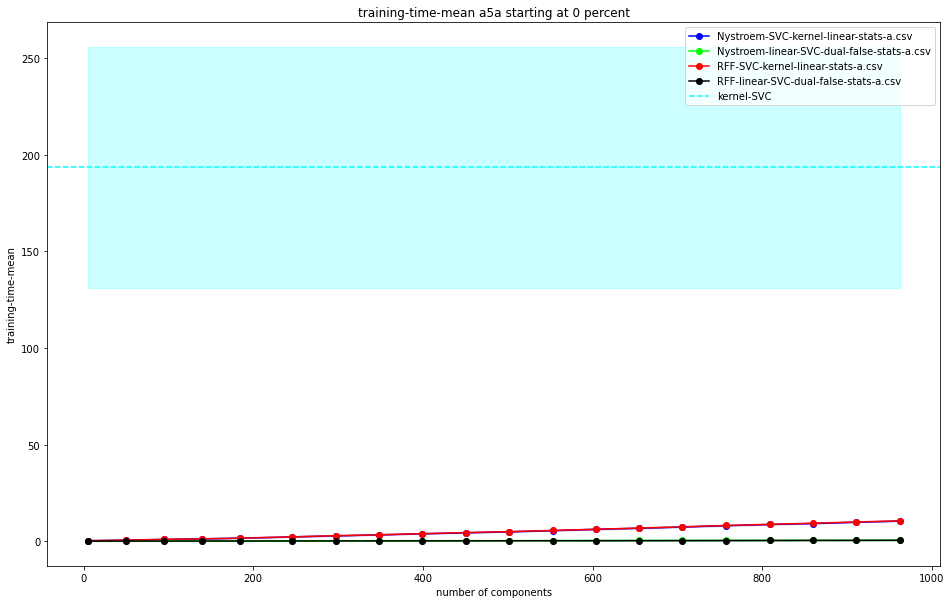

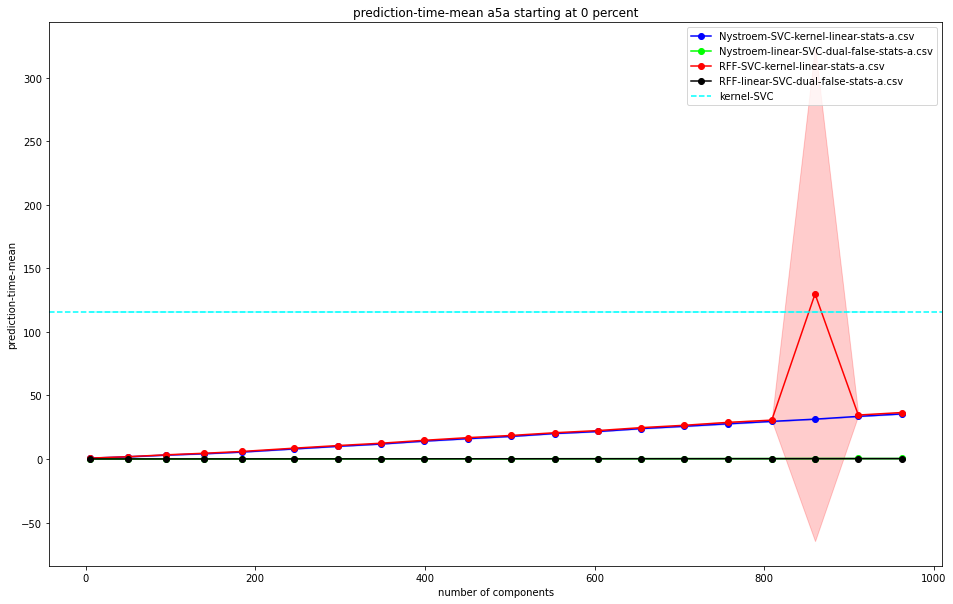

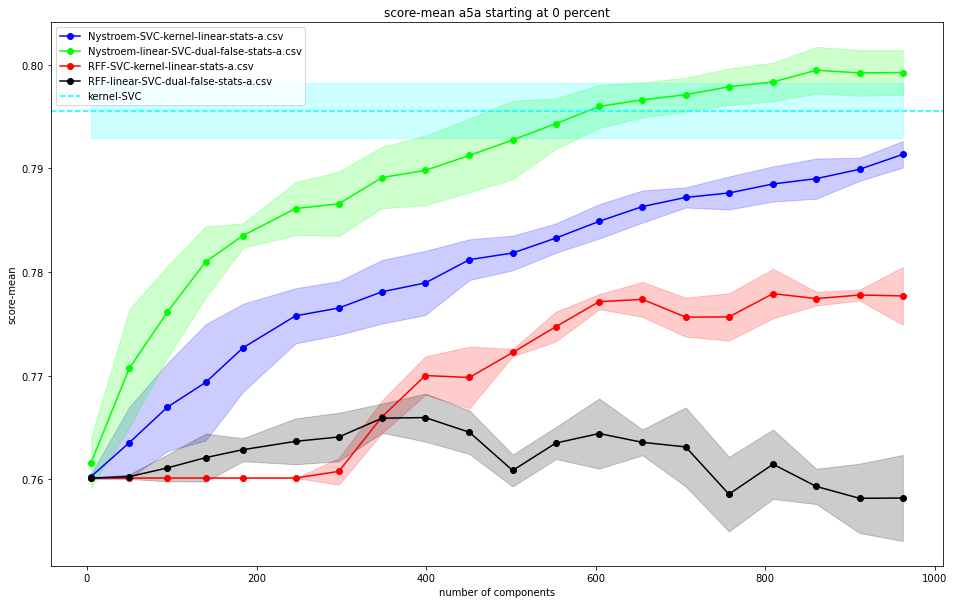

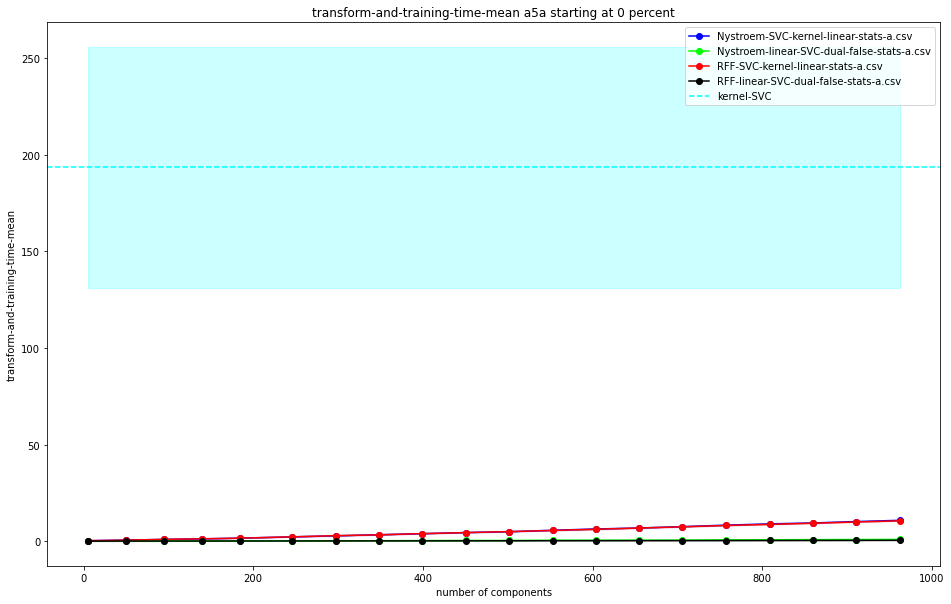

In [107]:
from plotting import view_plots_and_save_them


view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=kernel_list, constant_labels=kernel_list_names,
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')



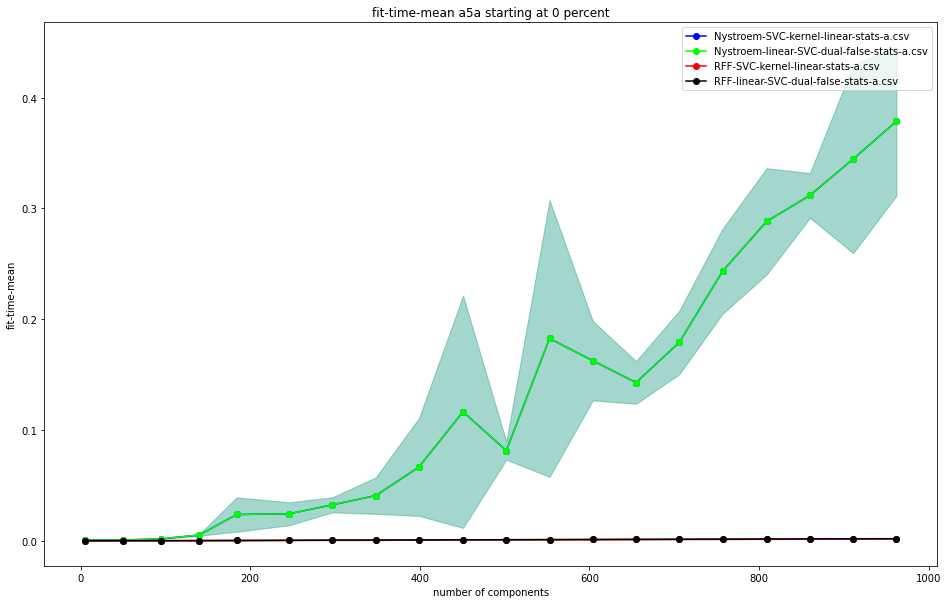

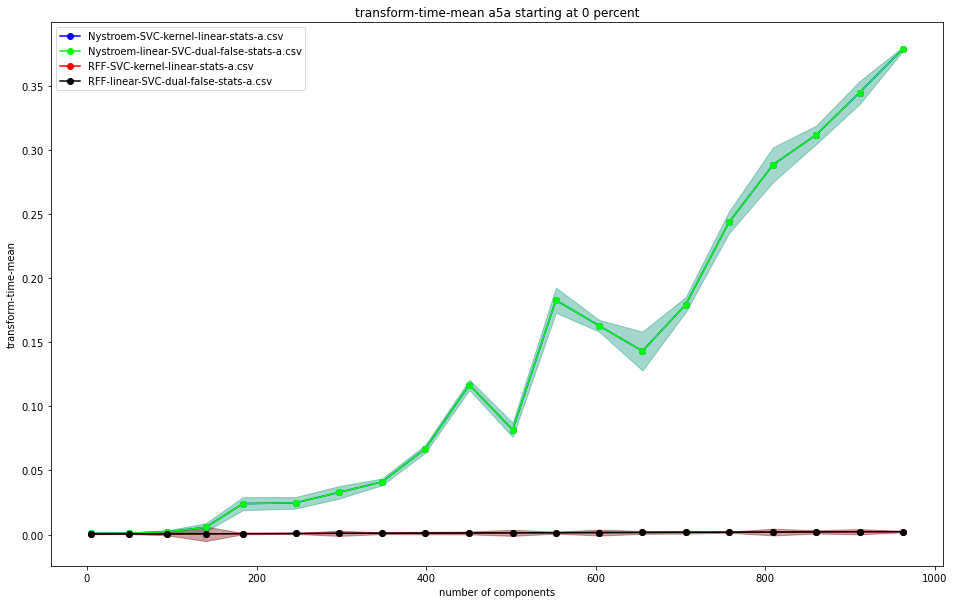

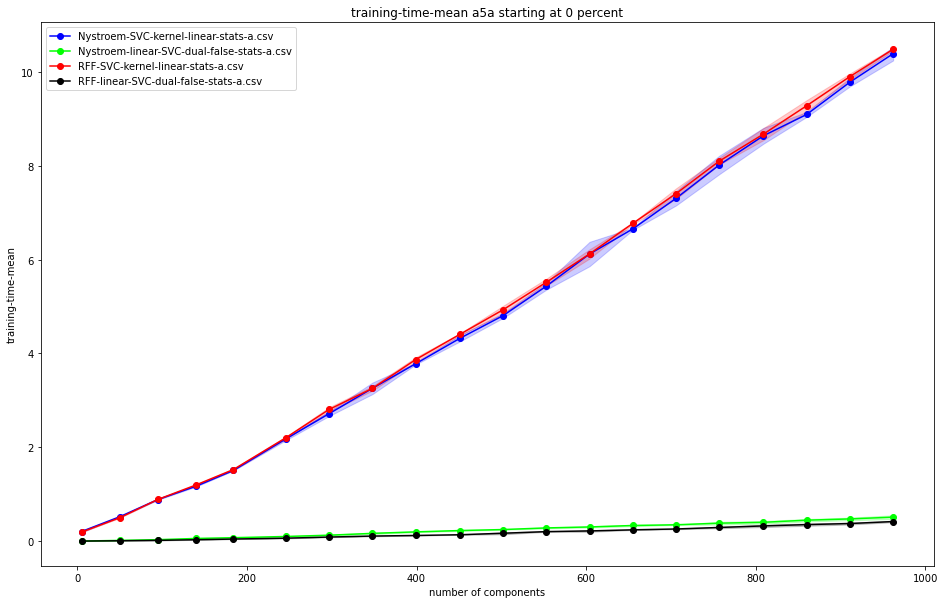

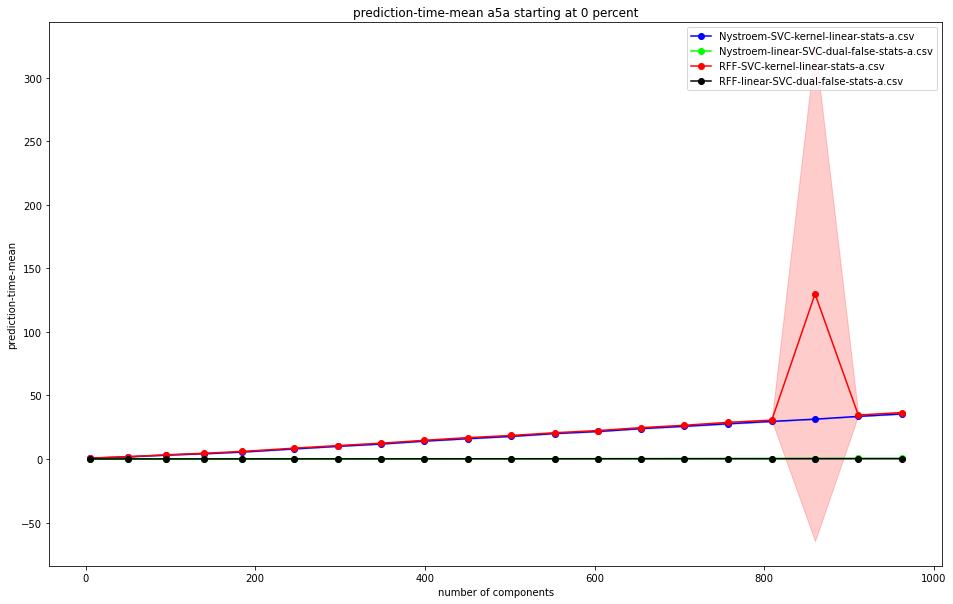

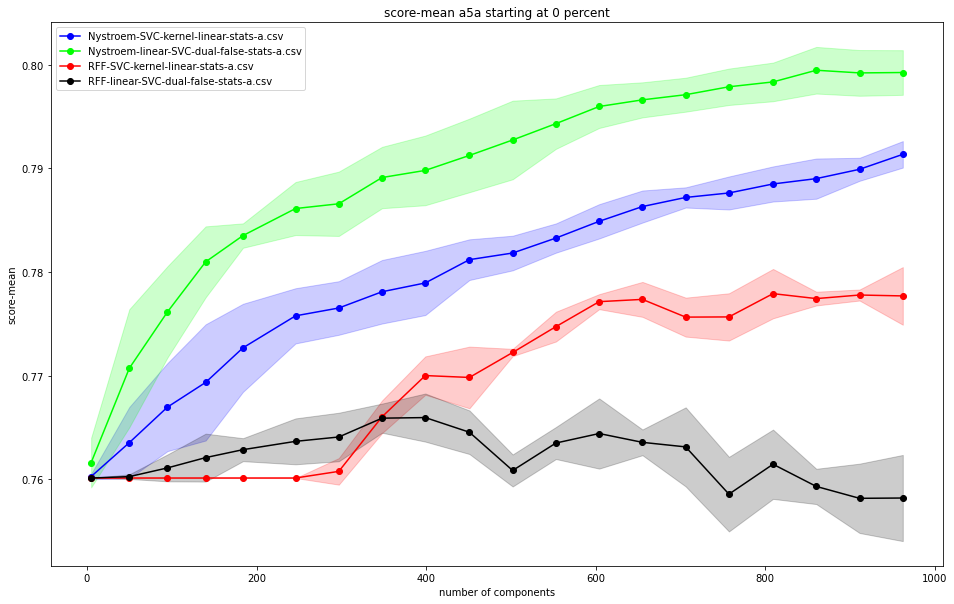

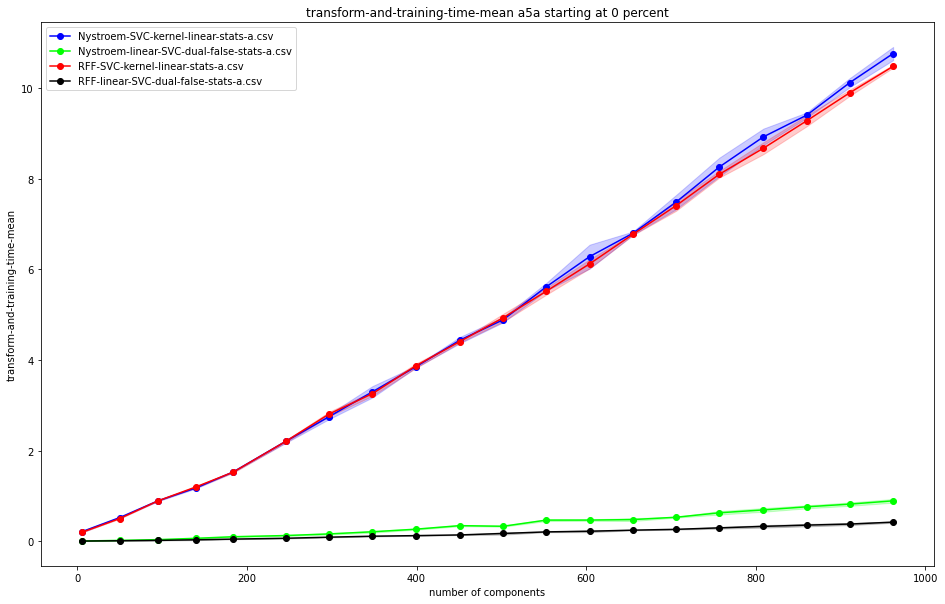

In [108]:

view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=kernel_list, constant_labels=[],
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')

Sin kernel

In [109]:

# Create a DataFrame for random_features files
random_features_data = pd.DataFrame()
random_features_list = []
random_features_list_names = []
random_features_data_verbose = pd.DataFrame()
for file in random_features_files:
    if not 'dual' in file:
        # mean
        file_path = os.path.join(results_directory, file)
        data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
        #data[percent_column] = data.apply(compute_percent, axis=1)
        data['File'] = file  # Add a column to identify the file 
        # 
        data[total_training_time_mean_column] = data[transform_time_mean_column] + data[training_time_mean_column]
        data[total_training_time_std_column] = data[transform_time_std_column] + data[training_time_std_column]

        random_features_data = pd.concat([random_features_data, data], ignore_index=True)
        random_features_list.append(data)
        random_features_list_names.append(file.replace('-stats.csv', ''))


kernel_data = pd.DataFrame()
kernel_data_verbose = pd.DataFrame()
kernel_list = []
kernel_list_names = []
for file in kernel_files:
    if not 'dual' in file:
        file_path = os.path.join(results_directory, file)
        data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed

        data['File'] = file  # Add a column to identify the file
        data.rename(columns={'score-in-test-mean': 'score-mean', 'score-in-test-std': 'score-std'}, inplace=True)
        data[total_training_time_mean_column] = data[training_time_mean_column]
        data[total_training_time_std_column] = data[training_time_std_column]

        kernel_data = pd.concat([kernel_data, data], ignore_index=True)
        kernel_list.append(data)
        kernel_list_names.append(file.replace('-stats.csv', ''))


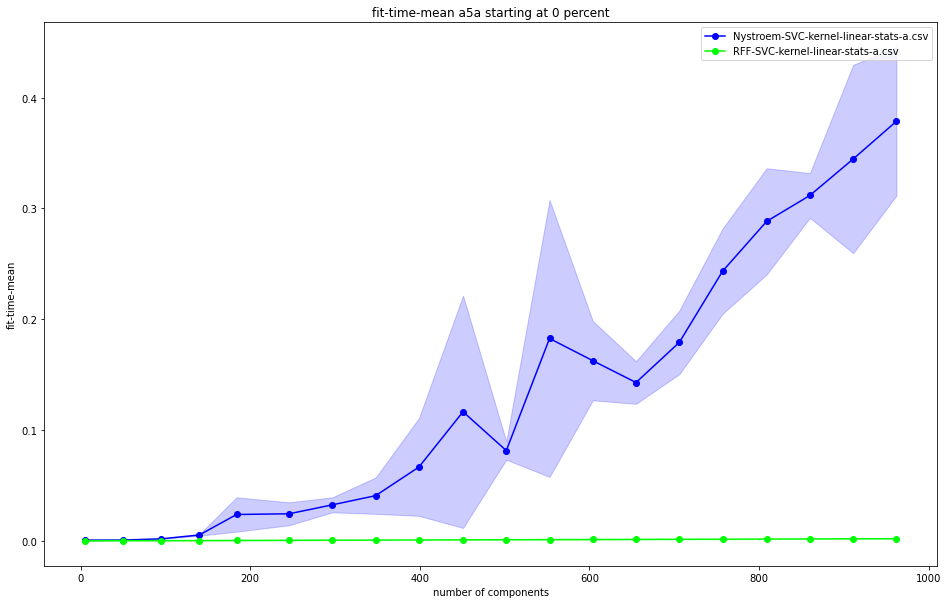

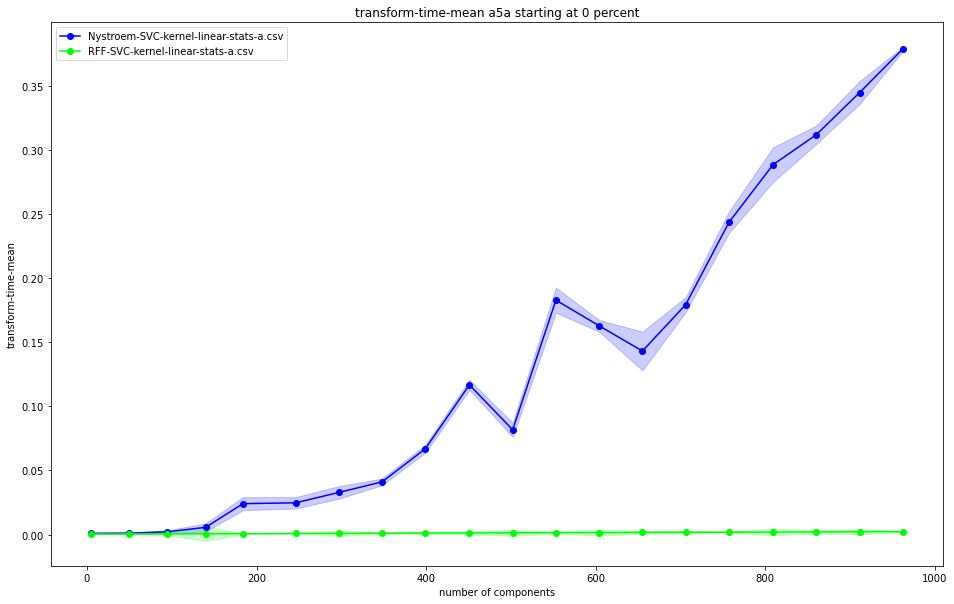

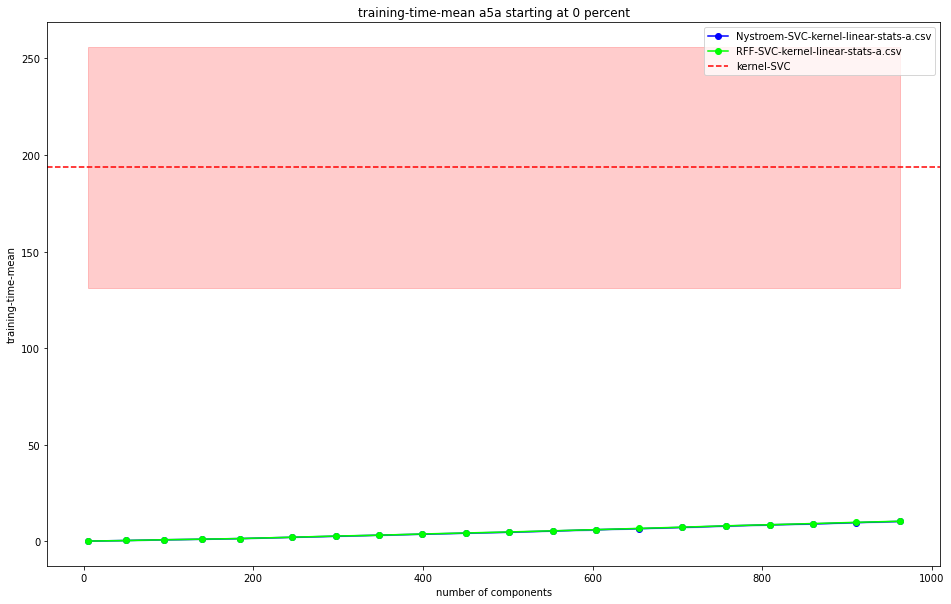

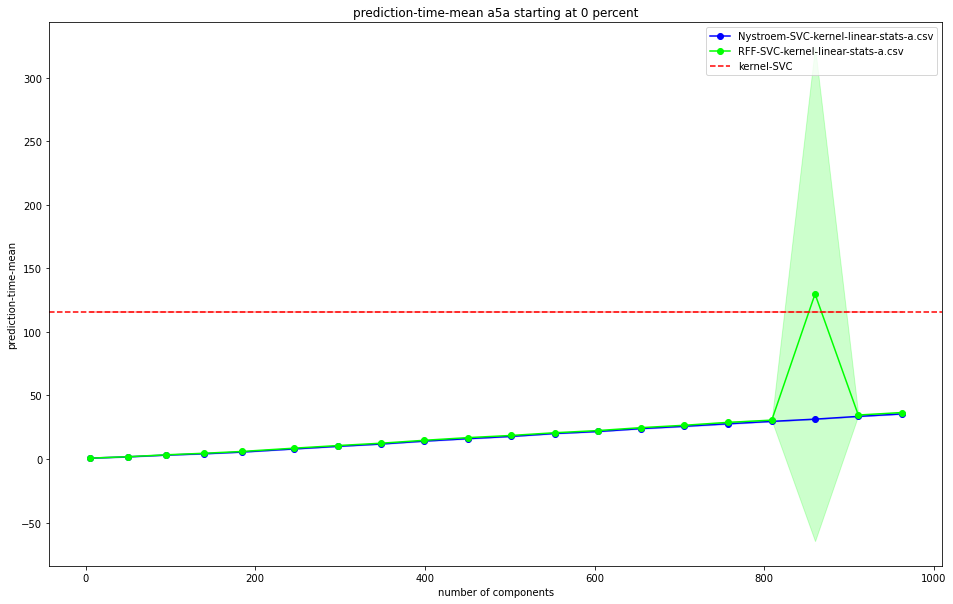

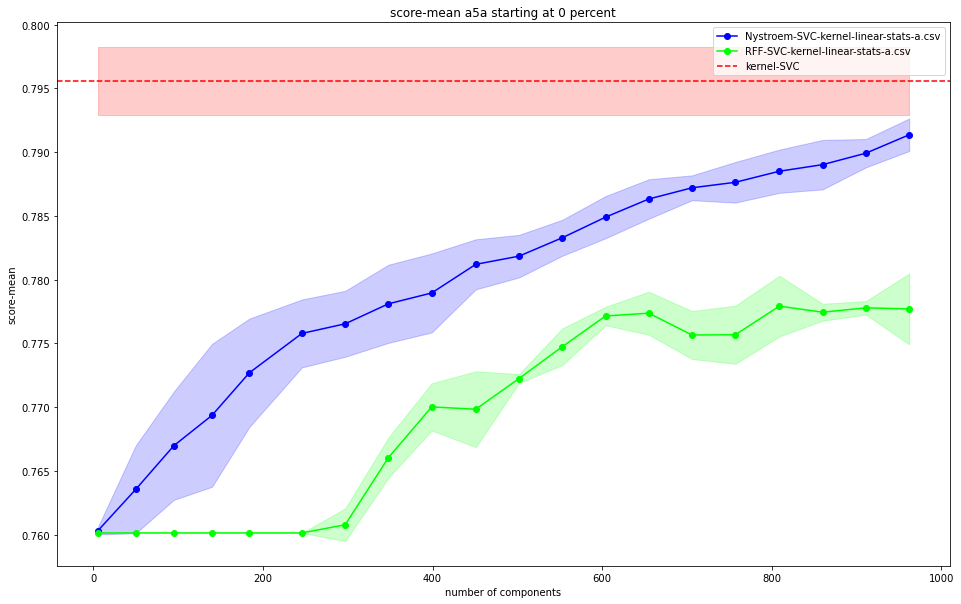

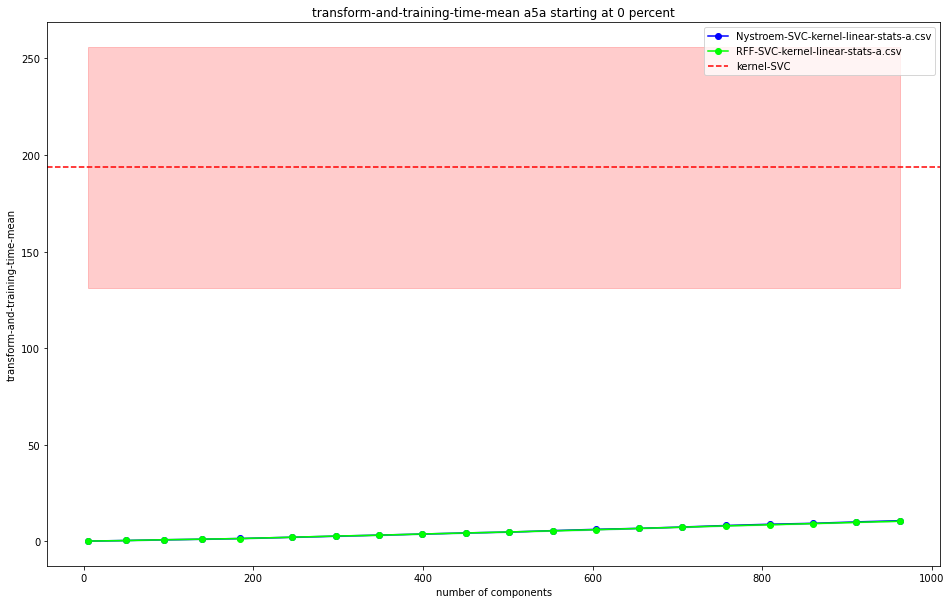

In [110]:
view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=kernel_list, constant_labels=kernel_list_names,
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')


# Sin kernel

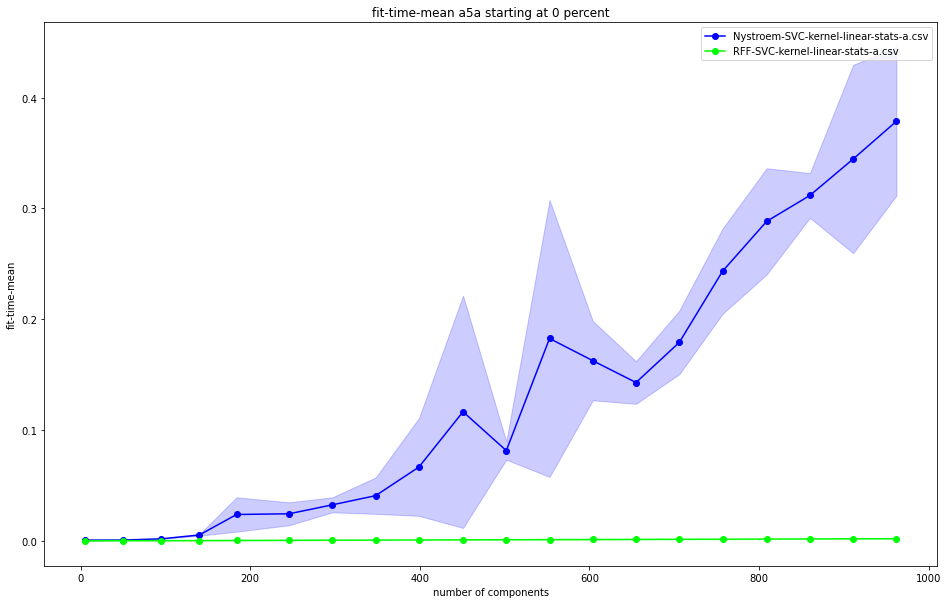

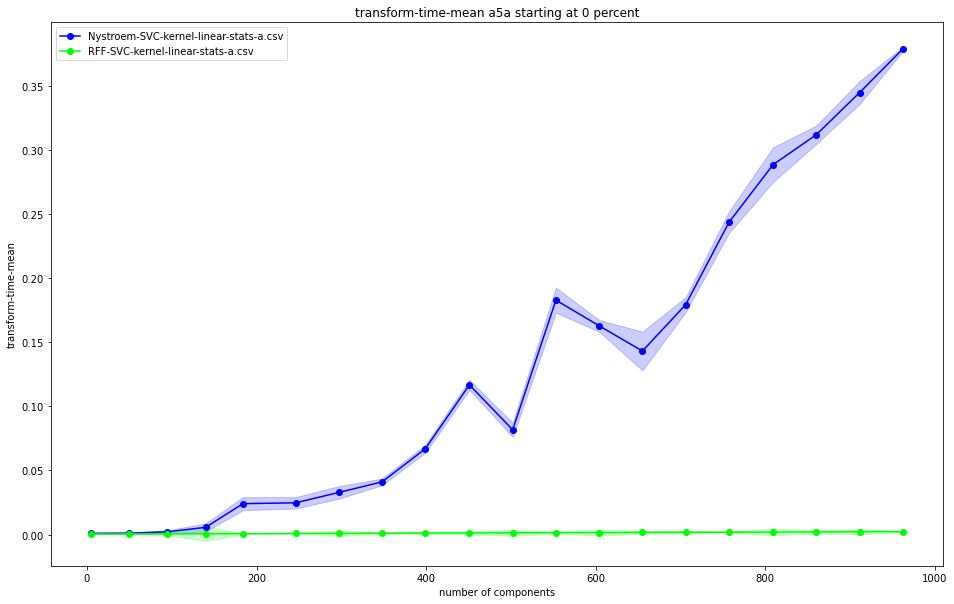

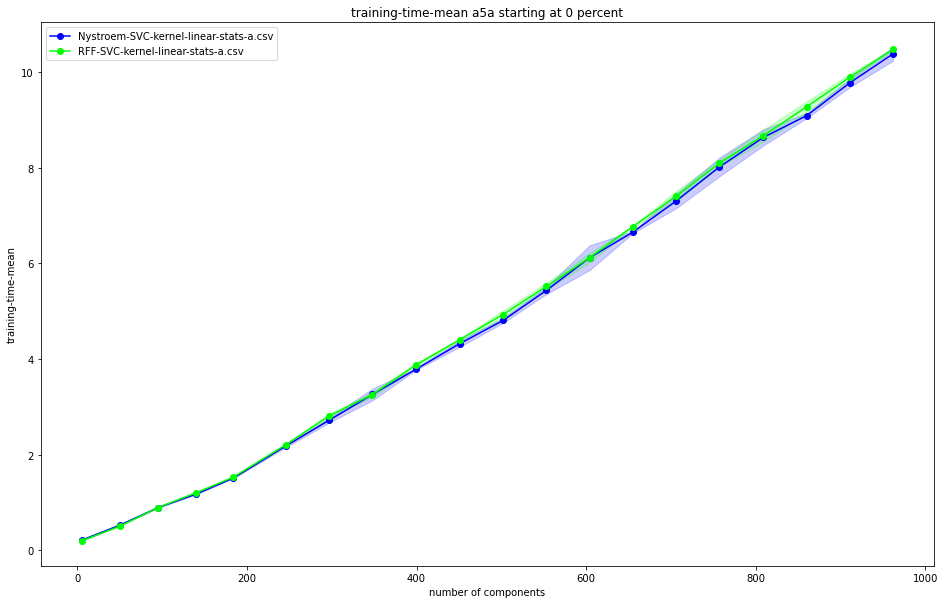

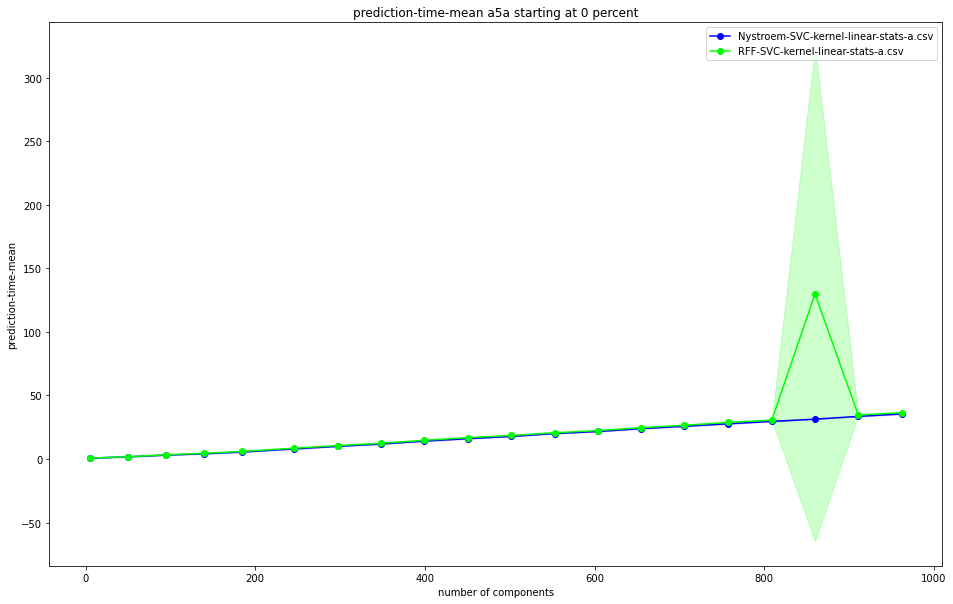

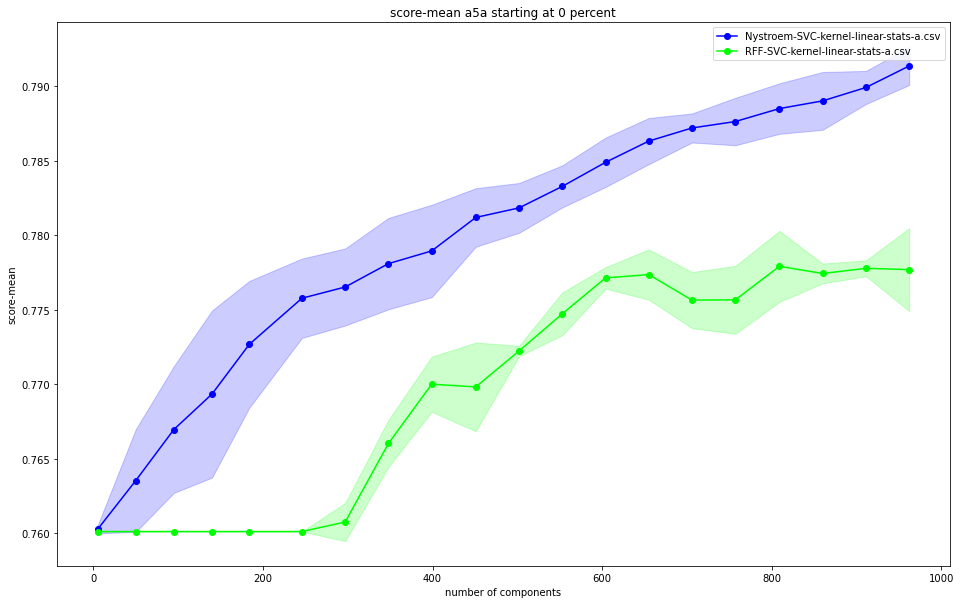

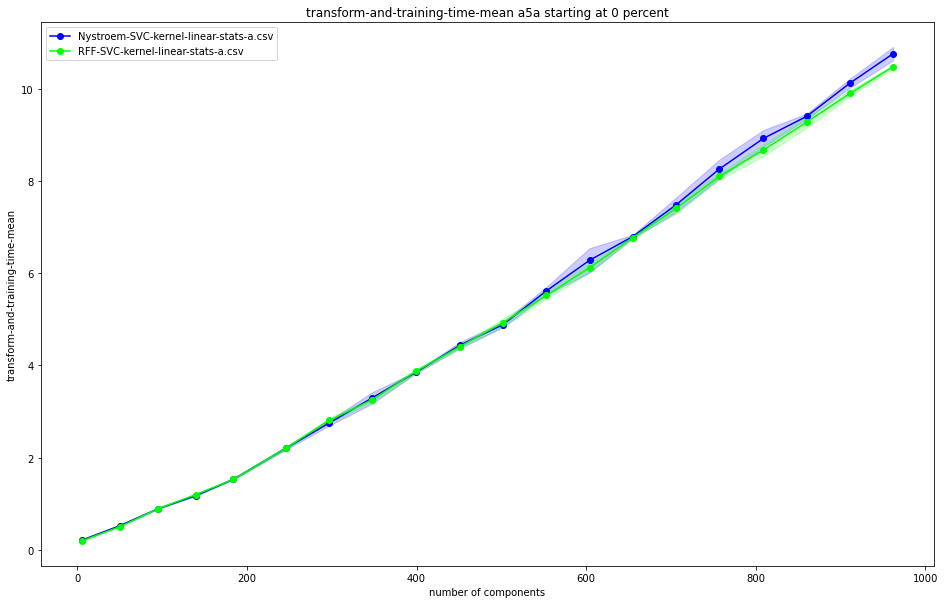

In [111]:
view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=[], constant_labels=[],
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')

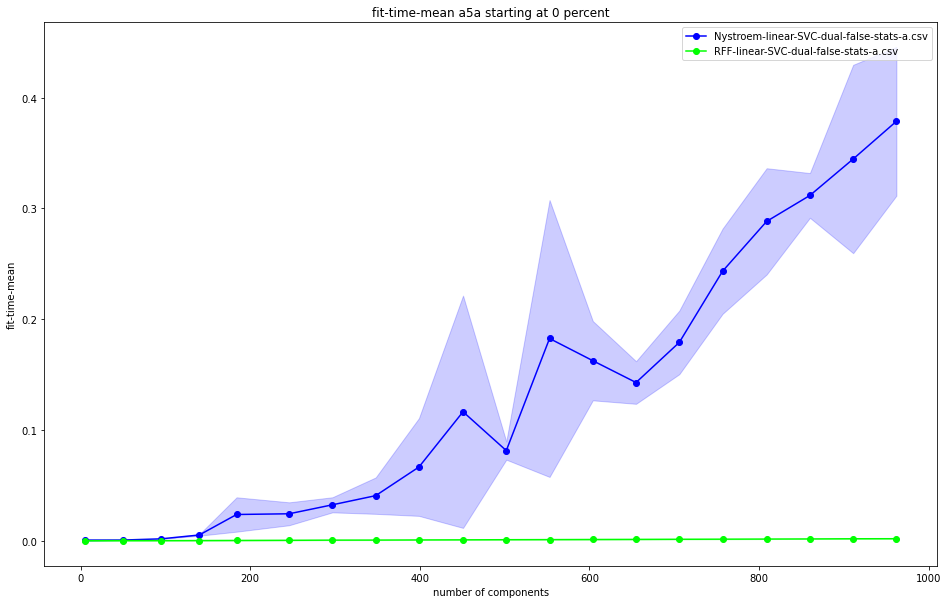

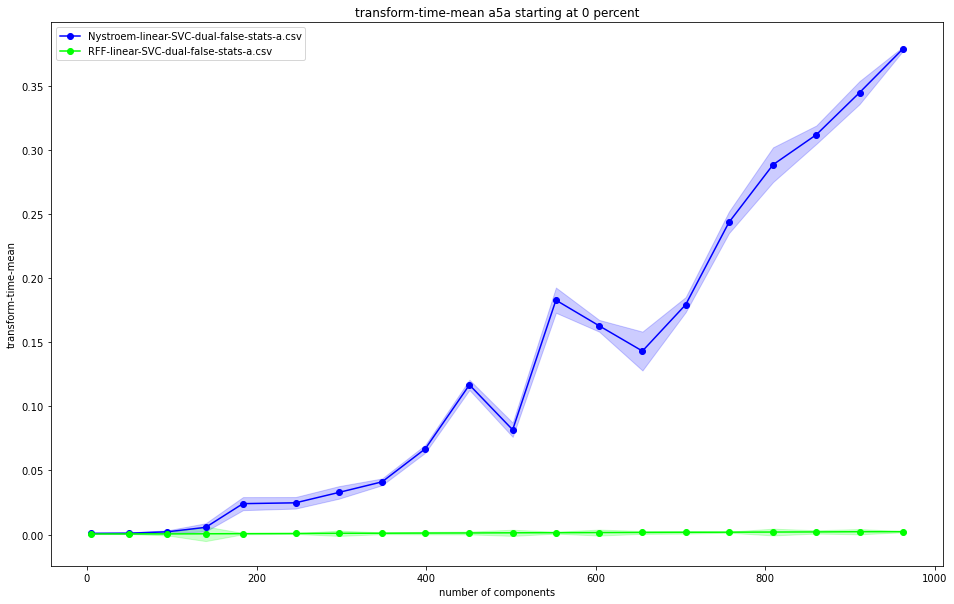

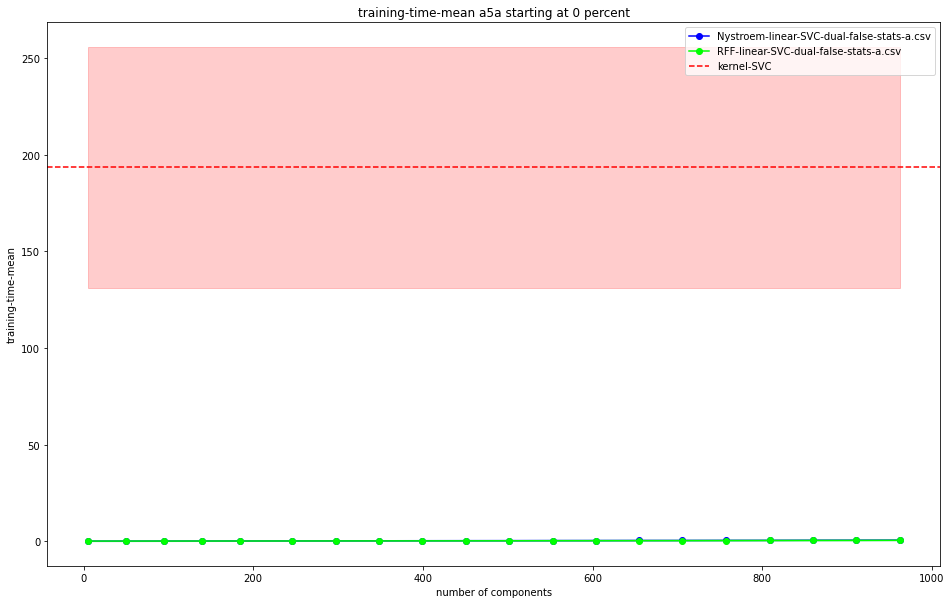

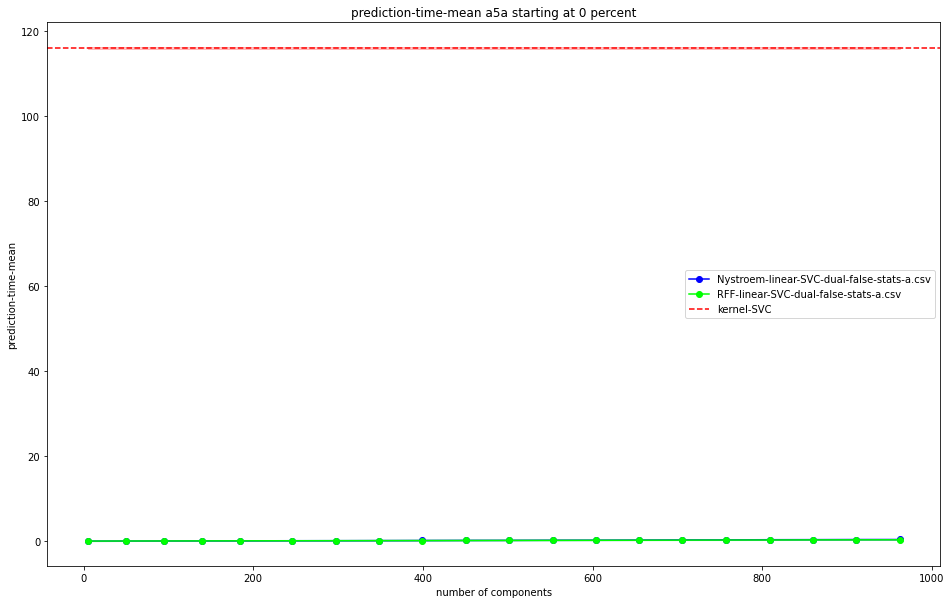

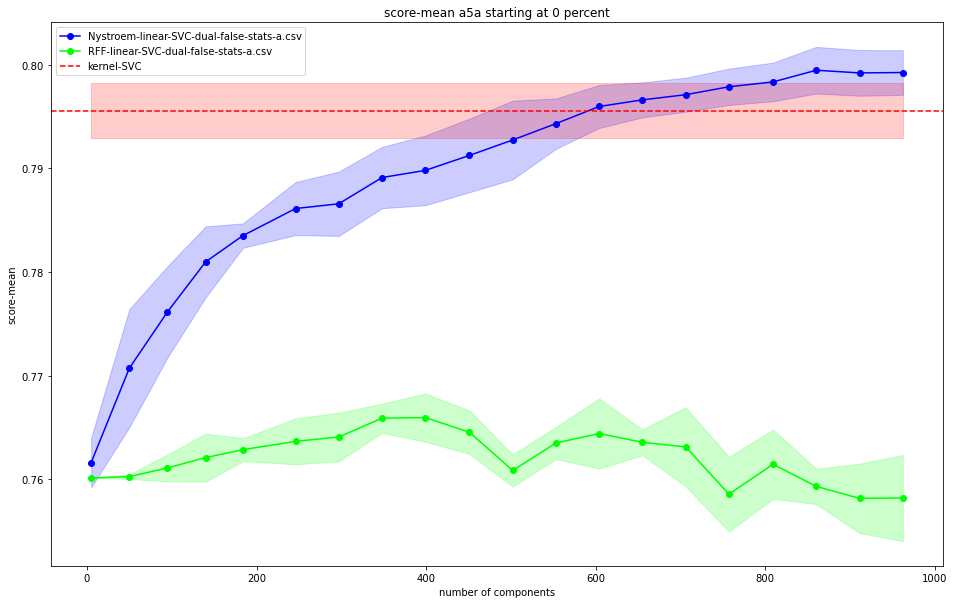

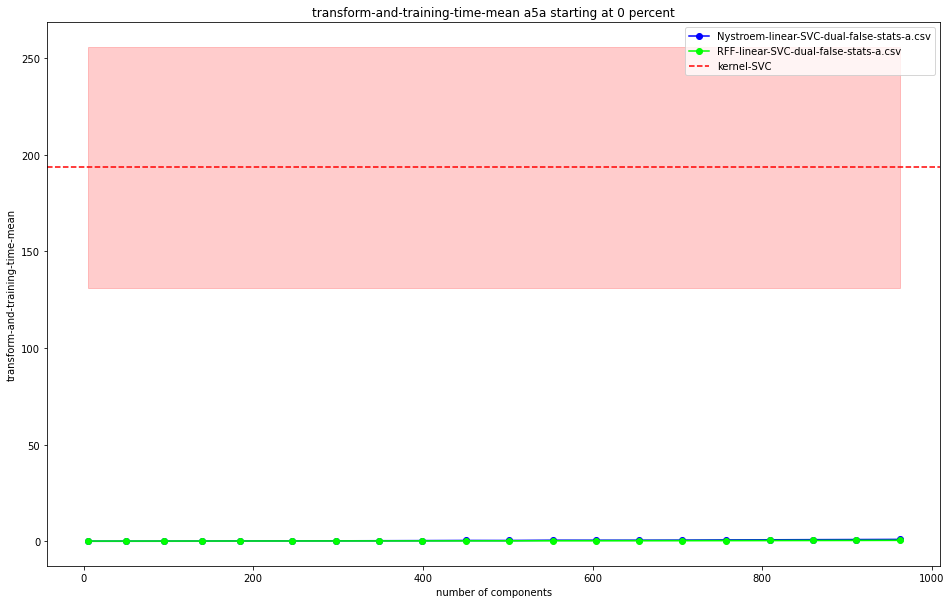

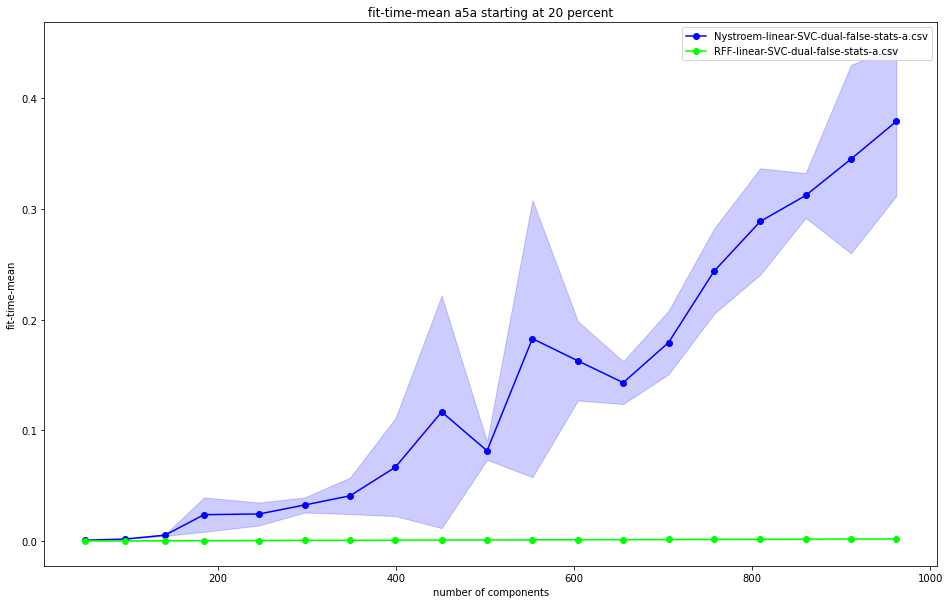

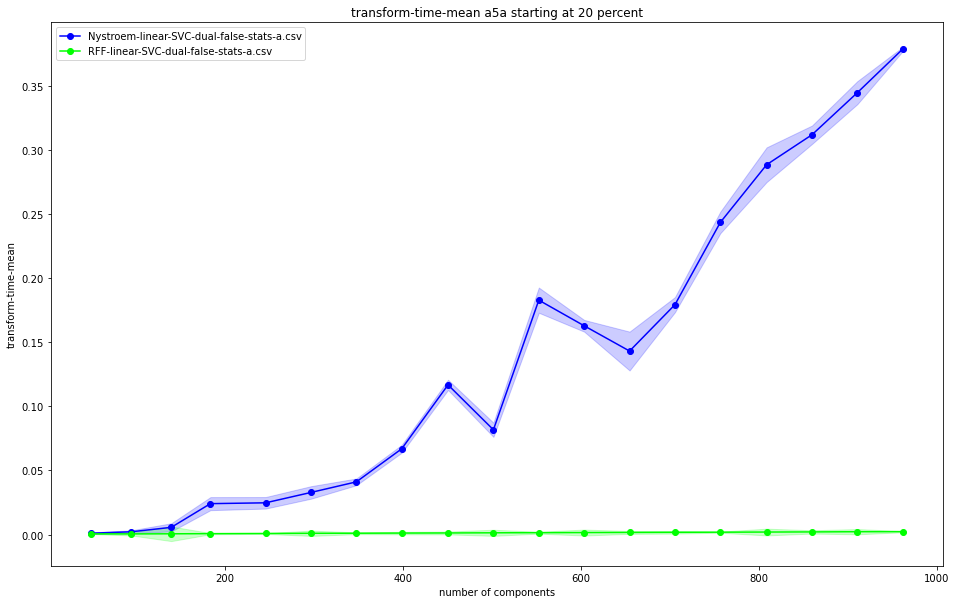

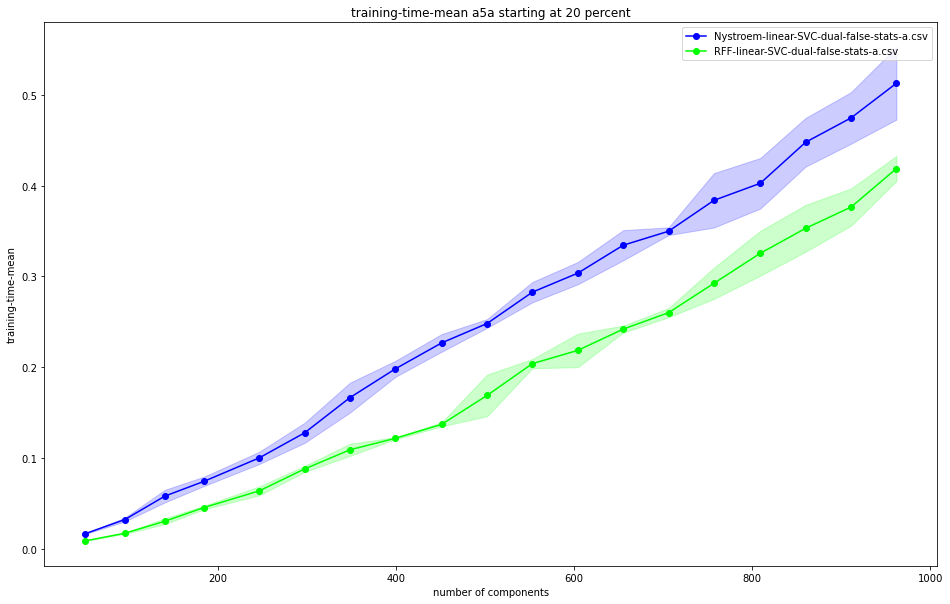

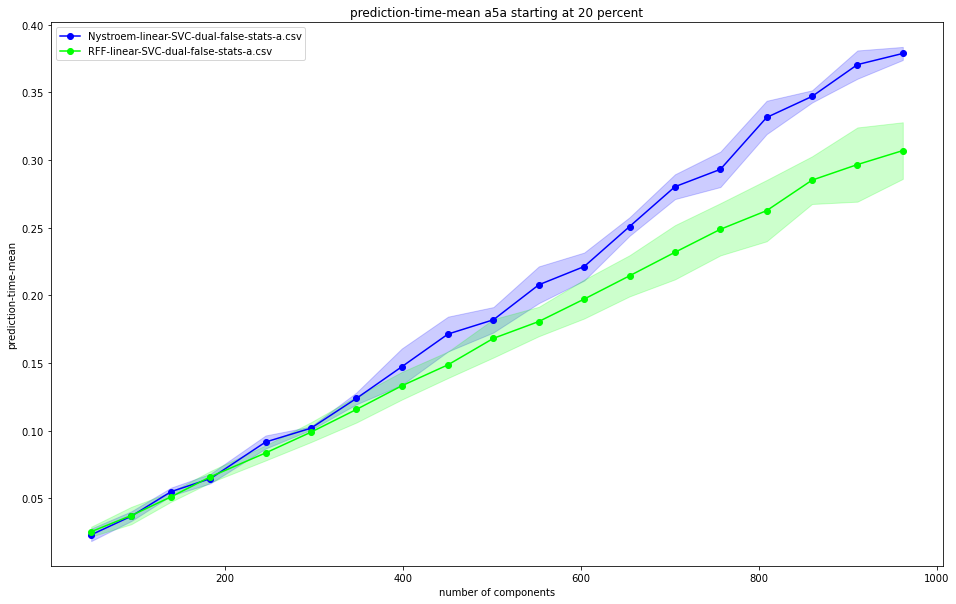

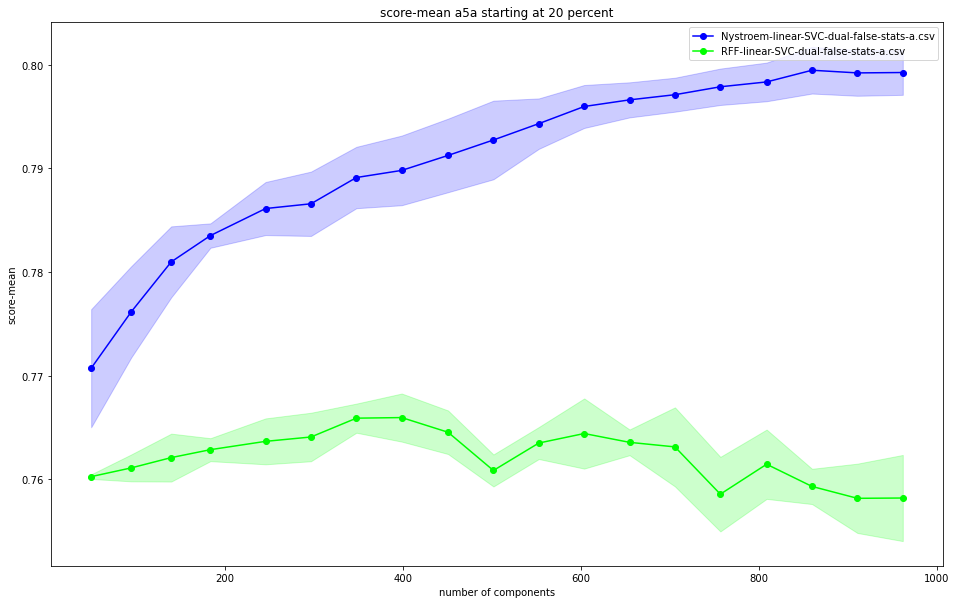

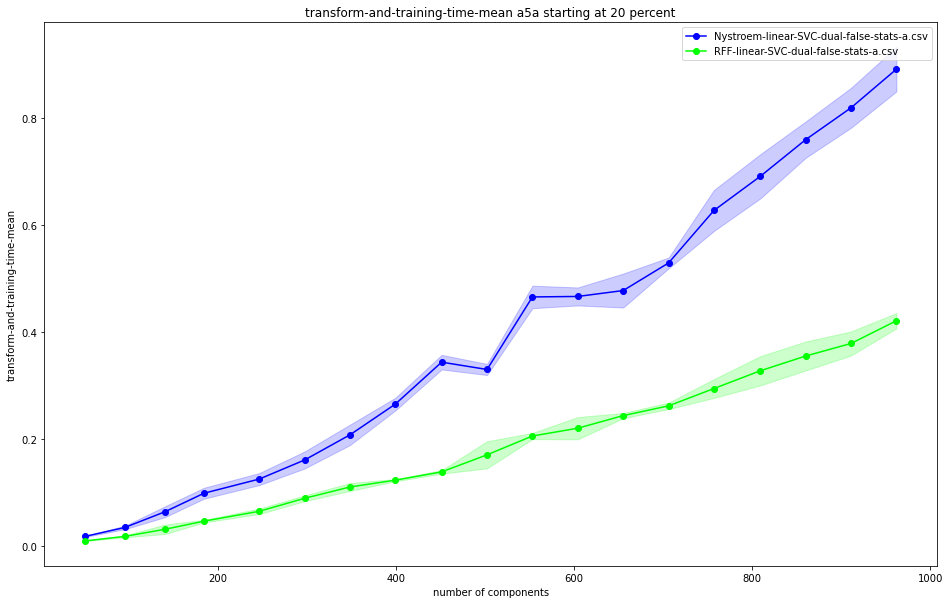

In [112]:

# Create a DataFrame for random_features files
random_features_data = pd.DataFrame()
random_features_list = []
random_features_list_names = []
random_features_data_verbose = pd.DataFrame()
for file in random_features_files:
    if 'dual' in file or 'kernel-SVC' in file:
        # mean
        file_path = os.path.join(results_directory, file)
        data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
        #data[percent_column] = data.apply(compute_percent, axis=1)
        data['File'] = file  # Add a column to identify the file 
        # 
        data[total_training_time_mean_column] = data[transform_time_mean_column] + data[training_time_mean_column]
        data[total_training_time_std_column] = data[transform_time_std_column] + data[training_time_std_column]

        random_features_data = pd.concat([random_features_data, data], ignore_index=True)
        random_features_list.append(data)
        random_features_list_names.append(file.replace('-stats.csv', ''))


kernel_data = pd.DataFrame()
kernel_data_verbose = pd.DataFrame()
kernel_list = []
kernel_list_names = []
for file in kernel_files:
    if 'dual' in file or 'kernel-SVC' in file:
        file_path = os.path.join(results_directory, file)
        data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed

        data['File'] = file  # Add a column to identify the file
        data.rename(columns={'score-in-test-mean': 'score-mean', 'score-in-test-std': 'score-std'}, inplace=True)
        data[total_training_time_mean_column] = data[training_time_mean_column]
        data[total_training_time_std_column] = data[training_time_std_column]

        kernel_data = pd.concat([kernel_data, data], ignore_index=True)
        kernel_list.append(data)
        kernel_list_names.append(file.replace('-stats.csv', ''))


view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=kernel_list, constant_labels=kernel_list_names,
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')
view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=[], constant_labels=[],
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 20,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')